####https://www.kaggle.com/smitisinghal/exploratory-data-analysis-on-covid-dataset

##Import Packages

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from keras.layers import Dense ,Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
from sklearn.ensemble import StackingRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from tensorflow.keras.optimizers import Adam, SGD ,RMSprop

In [7]:
data=pd.read_csv('PatientInfo.csv')

In [8]:
data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [10]:
data=data.drop([ 'contact_number','province','city','infected_by'],axis=1)
data.head()

,patient_id,sex,age,country,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,overseas inflow,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,overseas inflow,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,contact with patient,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,overseas inflow,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,contact with patient,NaN,2020-01-31,2020-02-24,NaN,released


###Change Columns Format

In [11]:
data.age=data['age'] .str.replace("[s]",".0")

<ipython-input-11-7d5dee5d89fd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.age=data['age'] .str.replace("[s]",".0")


In [12]:

data.age=pd.to_numeric(data['age'])
data

,patient_id,sex,age,country,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50.0,Korea,overseas inflow,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30.0,Korea,overseas inflow,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50.0,Korea,contact with patient,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20.0,Korea,overseas inflow,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20.0,Korea,contact with patient,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30.0,Korea,overseas inflow,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,overseas inflow,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,overseas inflow,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,overseas inflow,NaN,2020-06-18,NaN,NaN,isolated


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          5165 non-null   int64  
 1   sex                 4043 non-null   object 
 2   age                 3785 non-null   float64
 3   country             5165 non-null   object 
 4   infection_case      4246 non-null   object 
 5   symptom_onset_date  690 non-null    object 
 6   confirmed_date      5162 non-null   object 
 7   released_date       1587 non-null   object 
 8   deceased_date       66 non-null     object 
 9   state               5165 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 403.6+ KB


###Missvalue 

In [14]:
data.isnull().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
infection_case         919
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [15]:
data.shape

(5165, 10)

##UNIVARIATE ANALYSIS

###ANALYSIS ON INFECTION CASE

In [16]:

data['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

Text(0, 0.5, 'count')

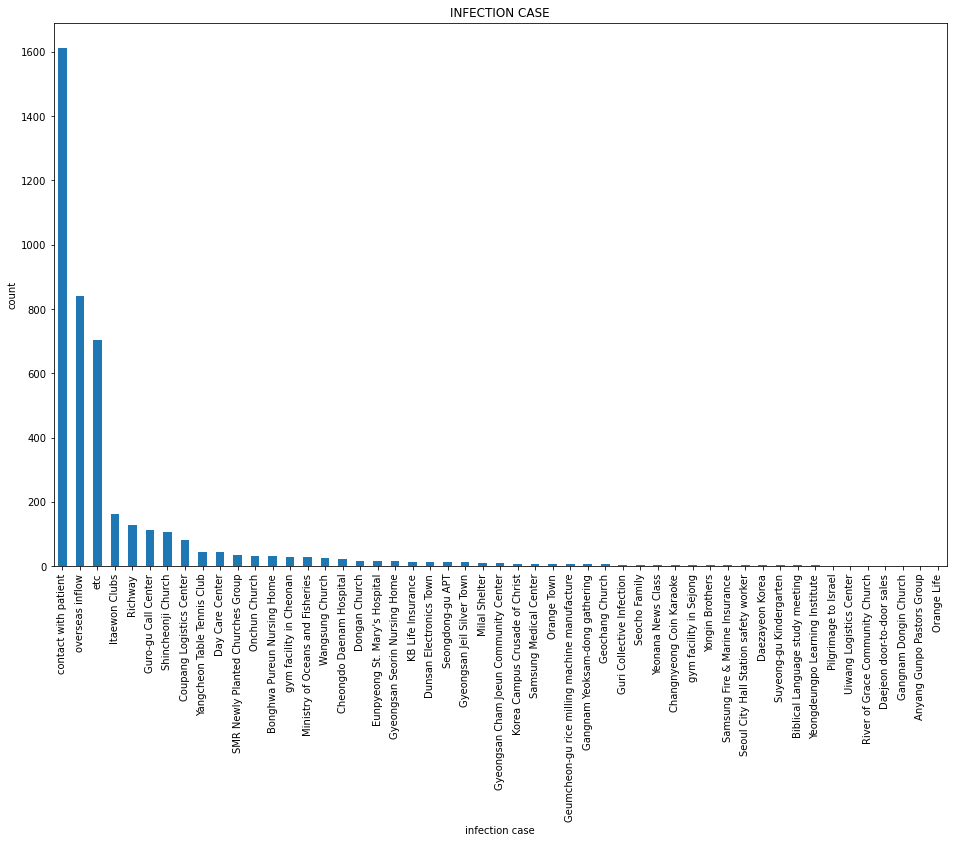

In [17]:
plt.figure(figsize=(16,10))
data.infection_case.value_counts().plot.bar()
plt.title("INFECTION CASE")
plt.xlabel("infection case")
plt.ylabel("count")

###ANALYSIS ON GENDER

Text(0.5, 1.0, 'Gender ratio')

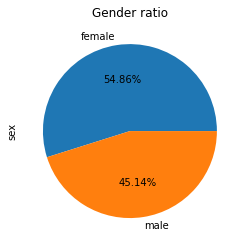

In [18]:
data.sex.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Gender ratio")

###ANALYSIS ON COUNTRY

Text(0, 0.5, 'count')

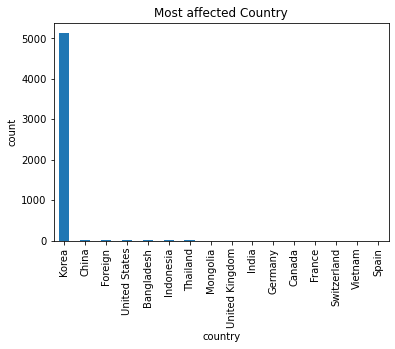

In [19]:
data.country.value_counts().plot.bar()
plt.title("Most affected Country")
plt.xlabel("country")
plt.ylabel("count")

###ANALYSIS ON STATE

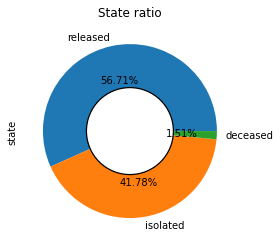

In [20]:
plt.title("State ratio")
data.state.value_counts().plot.pie(autopct="%0.2f%%")
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

###ANALYSIS ON AGE

Text(0.5, 0, 'Age range')

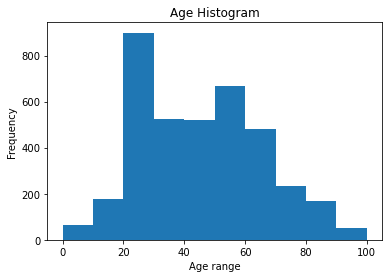

In [21]:
data.age.plot.hist()
plt.title("Age Histogram")
plt.xlabel("Age range")

C:\Users\mehrn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution plot')

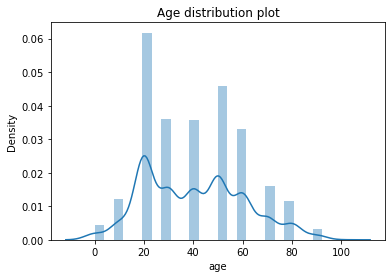

In [22]:
sns.distplot(data['age'])
plt.title("Age distribution plot")

###BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'age wise state frequency'}, xlabel='count', ylabel='age'>

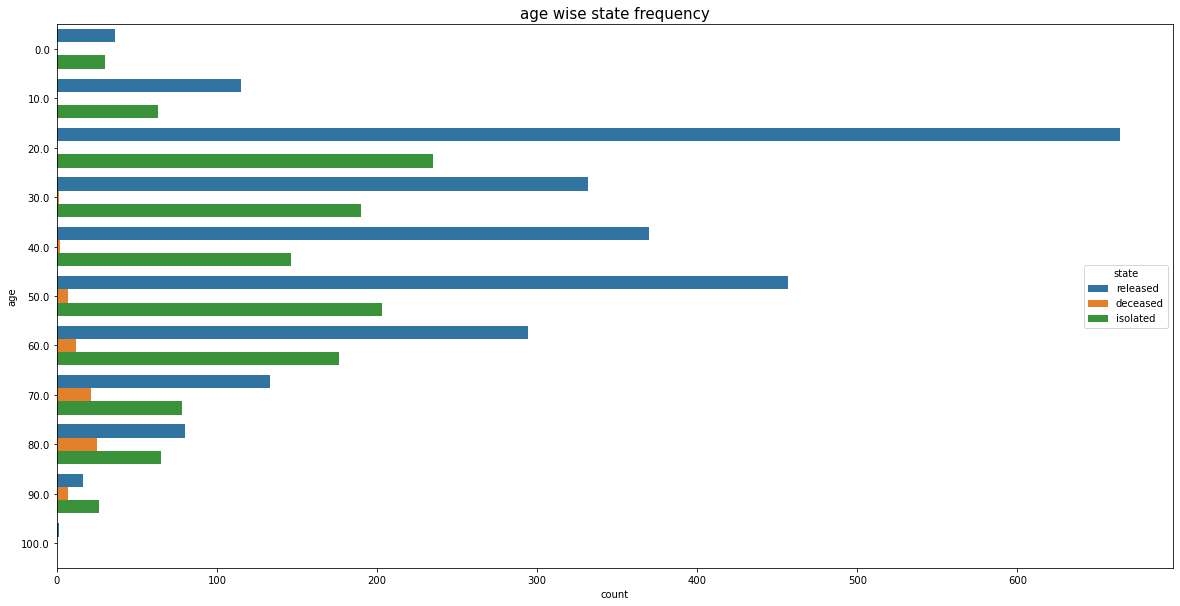

In [23]:
plt.figure(figsize=(20,10))
plt.title('age wise state frequency',fontsize = 15)
sns.countplot(y='age', hue='state',data=data)

Text(0.5, 1.0, 'age wise sex ratio')

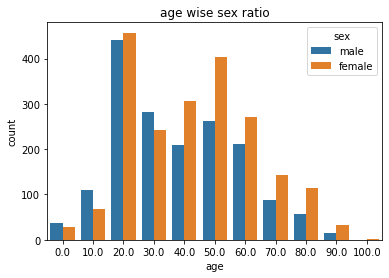

In [24]:
sns.countplot(data=data, x='age', hue='sex')
plt.title("age wise sex ratio")

Text(0.5, 1.0, 'State wise sex ratio')

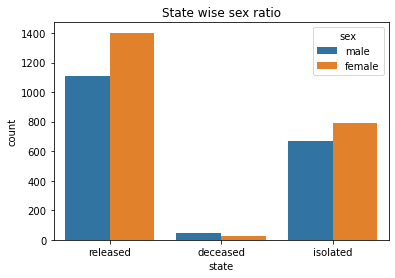

In [25]:
sns.countplot(data=data, x='state', hue='sex')
plt.title("State wise sex ratio")

In [26]:
data.columns

Index(['patient_id', 'sex', 'age', 'country', 'infection_case',
       'symptom_onset_date', 'confirmed_date', 'released_date',
       'deceased_date', 'state'],
      dtype='object')

In [27]:
data['confirmed_date']

0       2020-01-23
1       2020-01-30
2       2020-01-30
3       2020-01-30
4       2020-01-31
           ...    
5160    2020-05-30
5161    2020-06-16
5162    2020-06-18
5163    2020-06-18
5164    2020-06-18
Name: confirmed_date, Length: 5165, dtype: object

In [28]:
data['confirmed_date'] = pd.to_datetime(data['confirmed_date'], format='%Y-%m-%d')
data['released_date'] = pd.to_datetime(data['released_date'], format='%Y-%m-%d')

Text(0.5, 1.0, 'Scatter plot of confirmed and released date of patient')

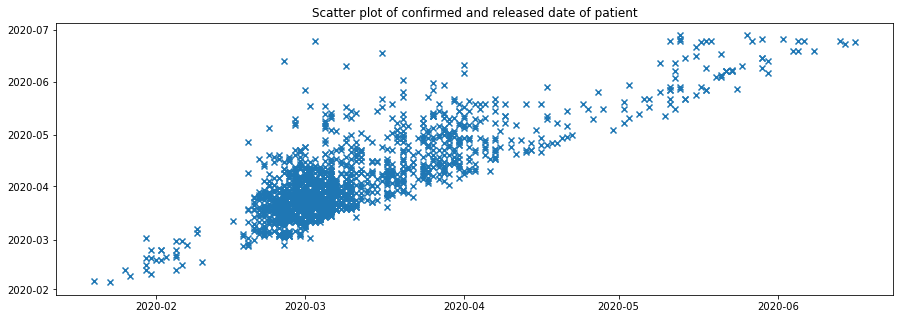

In [29]:
plt.figure(figsize=(15,5))
plt.scatter(data['confirmed_date'],data['released_date'],marker='x')
plt.title("Scatter plot of confirmed and released date of patient")


###prepare dataset for train

In [30]:
data.isna().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
infection_case         919
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [31]:
data=data.drop(['patient_id' ,'deceased_date','state'],axis=1)

In [32]:
data['symptom_onset_date'] = pd.to_datetime(data['symptom_onset_date'],errors='coerce')

In [33]:
data['symptom_days'] = data['confirmed_date']-data['symptom_onset_date']



In [34]:
data['recovery_days']=data['released_date']-data['confirmed_date']

In [35]:
data

,sex,age,country,infection_case,symptom_onset_date,confirmed_date,released_date,symptom_days,recovery_days
0,male,50.0,Korea,overseas inflow,2020-01-22,2020-01-23,2020-02-05,1 days,13 days
1,male,30.0,Korea,overseas inflow,NaT,2020-01-30,2020-03-02,NaT,32 days
2,male,50.0,Korea,contact with patient,NaT,2020-01-30,2020-02-19,NaT,20 days
3,male,20.0,Korea,overseas inflow,2020-01-26,2020-01-30,2020-02-15,4 days,16 days
4,female,20.0,Korea,contact with patient,NaT,2020-01-31,2020-02-24,NaT,24 days
...,...,...,...,...,...,...,...,...,...
5160,female,30.0,Korea,overseas inflow,NaT,2020-05-30,2020-06-13,NaT,14 days
5161,NaN,NaN,Korea,overseas inflow,NaT,2020-06-16,2020-06-24,NaT,8 days
5162,NaN,NaN,Bangladesh,overseas inflow,NaT,2020-06-18,NaT,NaT,NaT
5163,NaN,NaN,Bangladesh,overseas inflow,NaT,2020-06-18,NaT,NaT,NaT


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   sex                 4043 non-null   object         
 1   age                 3785 non-null   float64        
 2   country             5165 non-null   object         
 3   infection_case      4246 non-null   object         
 4   symptom_onset_date  689 non-null    datetime64[ns] 
 5   confirmed_date      5162 non-null   datetime64[ns] 
 6   released_date       1587 non-null   datetime64[ns] 
 7   symptom_days        688 non-null    timedelta64[ns]
 8   recovery_days       1587 non-null   timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), object(3), timedelta64[ns](2)
memory usage: 363.3+ KB


In [37]:
data=data.drop(['symptom_onset_date' ,'confirmed_date','released_date'],axis=1)

In [38]:
data=data.dropna(subset=['recovery_days'])

In [39]:
data.shape

(1587, 6)

In [40]:
data.recovery_days.value_counts()

16 days     86
17 days     74
24 days     67
19 days     66
23 days     64
            ..
63 days      1
108 days     1
93 days      1
71 days      1
0 days       1
Name: recovery_days, Length: 77, dtype: int64

In [41]:
data['recovery_days'] = data['recovery_days'].dt.days.astype('int16')

In [42]:
data.recovery_days.value_counts()

16     86
17     74
24     67
19     66
23     64
       ..
63      1
57      1
1       1
2       1
114     1
Name: recovery_days, Length: 77, dtype: int64

In [43]:
data.shape

(1587, 6)

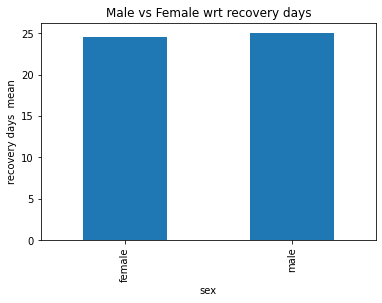

In [44]:
data.groupby('sex')['recovery_days'].mean().plot.bar()




plt.ylabel("recovery days  mean")
plt.title("Male vs Female wrt recovery days")

 
plt.show()

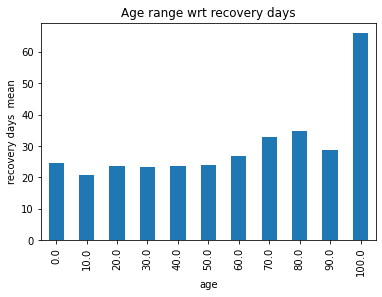

In [45]:
data.groupby('age')['recovery_days'].mean().plot.bar()




plt.ylabel("recovery days  mean")
plt.title("Age range wrt recovery days")

 
plt.show()

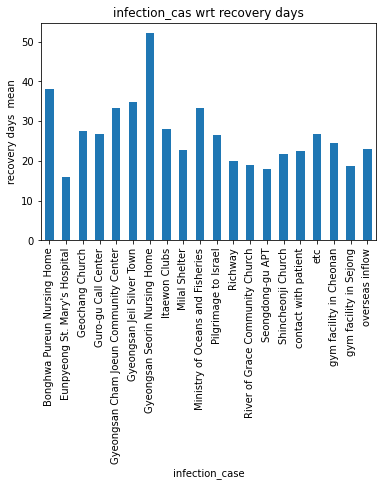

In [46]:
data.groupby('infection_case')['recovery_days'].mean().plot.bar()

plt.ylabel("recovery days  mean")
plt.title("infection_cas wrt recovery days")

 
plt.show()

In [47]:
data.shape

(1587, 6)

In [48]:
data.isna().sum()


sex                  1
age                 11
country              0
infection_case     574
symptom_days      1419
recovery_days        0
dtype: int64

In [49]:
data.symptom_days.value_counts()

1 days     32
2 days     20
5 days     17
3 days     17
4 days     17
6 days     15
7 days      9
0 days      8
8 days      5
10 days     4
11 days     3
9 days      3
15 days     3
45 days     2
12 days     2
16 days     1
41 days     1
19 days     1
-8 days     1
42 days     1
48 days     1
25 days     1
-1 days     1
47 days     1
13 days     1
33 days     1
Name: symptom_days, dtype: int64

In [50]:
data.isna().sum()

sex                  1
age                 11
country              0
infection_case     574
symptom_days      1419
recovery_days        0
dtype: int64

In [51]:
data.columns


Index(['sex', 'age', 'country', 'infection_case', 'symptom_days',
       'recovery_days'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   sex             1586 non-null   object         
 1   age             1576 non-null   float64        
 2   country         1587 non-null   object         
 3   infection_case  1013 non-null   object         
 4   symptom_days    168 non-null    timedelta64[ns]
 5   recovery_days   1587 non-null   int16          
dtypes: float64(1), int16(1), object(3), timedelta64[ns](1)
memory usage: 77.5+ KB


In [53]:
data.age=data.age.fillna(data.age.mean())

In [54]:
data.symptom_days=data.symptom_days.fillna(method='ffill')

In [55]:
data.symptom_days.value_counts()

4 days     713
2 days     169
5 days     138
9 days     138
1 days     113
6 days      91
8 days      79
3 days      45
7 days      27
0 days      18
12 days     18
10 days      9
15 days      6
45 days      4
41 days      3
25 days      3
11 days      3
33 days      2
19 days      1
42 days      1
16 days      1
-8 days      1
-1 days      1
48 days      1
47 days      1
13 days      1
Name: symptom_days, dtype: int64

In [56]:

data['symptom_days'] = data['symptom_days'].dt.days.astype('int16')

In [57]:
data['sex'].fillna(data['sex'].mode()[0], inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['infection_case'].fillna(data['infection_case'].mode()[0], inplace=True)


In [58]:
data

,sex,age,country,infection_case,symptom_days,recovery_days
0,male,50.000000,Korea,overseas inflow,1,13
1,male,30.000000,Korea,overseas inflow,1,32
2,male,50.000000,Korea,contact with patient,1,20
3,male,20.000000,Korea,overseas inflow,4,16
4,female,20.000000,Korea,contact with patient,4,24
...,...,...,...,...,...,...
5157,female,20.000000,Korea,overseas inflow,2,32
5158,female,10.000000,China,overseas inflow,2,12
5159,female,30.000000,Korea,Itaewon Clubs,2,34
5160,female,30.000000,Korea,overseas inflow,2,14


In [59]:
data.isna().sum()

sex               0
age               0
country           0
infection_case    0
symptom_days      0
recovery_days     0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1587 non-null   object 
 1   age             1587 non-null   float64
 2   country         1587 non-null   object 
 3   infection_case  1587 non-null   object 
 4   symptom_days    1587 non-null   int16  
 5   recovery_days   1587 non-null   int16  
dtypes: float64(1), int16(2), object(3)
memory usage: 68.2+ KB


###Encod categorical features

In [61]:
encoded = pd.get_dummies(data[['sex', 'country','infection_case']], drop_first=True)

data=data.drop(['sex', 'country','infection_case'],axis=1)
data = data.join(encoded)

In [62]:
data.recovery_days

0       13
1       32
2       20
3       16
4       24
        ..
5157    32
5158    12
5159    34
5160    14
5161     8
Name: recovery_days, Length: 1587, dtype: int16

###Split data 

In [63]:
# X=data.iloc[:,:-1]
y=data['recovery_days']
X=data.drop(['recovery_days'],axis=1)


In [64]:
y.value_counts()

16     86
17     74
24     67
19     66
23     64
       ..
63      1
57      1
1       1
2       1
114     1
Name: recovery_days, Length: 77, dtype: int64

In [65]:

X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.25,shuffle=True , random_state=123)

In [66]:
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(1190, 27) (397, 27) (1190,) (397,)


###scale data

In [67]:

sc_X=MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

sc_y=MinMaxScaler()
y_train=y_train.values.reshape(-1,1)
y_train=sc_y.fit_transform(y_train)
y_test=y_test.values.reshape(-1,1)
y_test=sc_y.transform(y_test)

###ML models

In [68]:
svr=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor()
KNN=KNeighborsRegressor()
XGB=GradientBoostingRegressor()
RF=RandomForestRegressor()


In [69]:
network = Sequential()
network.add(Dense(128, input_dim=X_train.shape[1], activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(128, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(256, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(256, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))

network.add(Dense(1, activation='linear'))


network.compile(loss='mse', optimizer=Adam(lr=0.001))

history = network.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))

C:\Users\mehrn\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
38/38 [==============================] - 1s 7ms/step - loss: 4.0017 - val_loss: 2.2840
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 1.4419 - val_loss: 0.7819
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4881 - val_loss: 0.2626
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1673 - val_loss: 0.0938
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.0402
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.0227
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0170
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0150
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.0143
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 11/

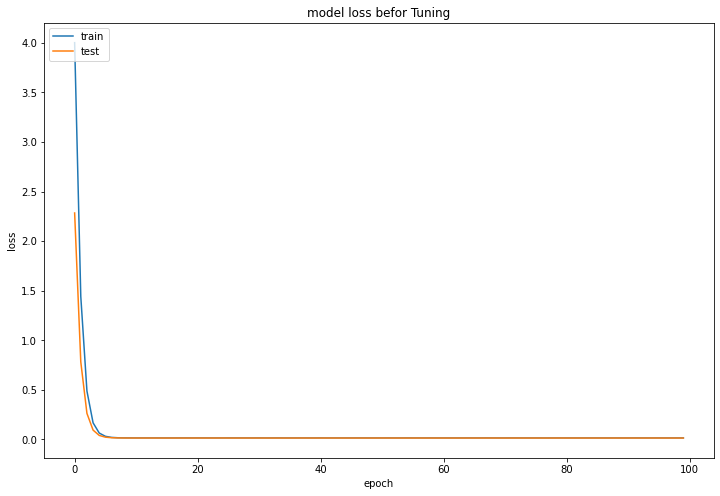

In [70]:
  plt.figure(figsize=(12,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss befor Tuning')
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [71]:
def MLP(neurons1=128,neurons2=256,neurons3=128,neurons4=256,act1='relu',act2='relu',act3='relu',act4='relu',optimizer=Adam(lr=0.001),epochs=100
        ,loss='mse', batch_size=33,kernel_regularizer='l2',dropout=0.2):
  network = Sequential()
  network.add(Dense(neurons1, input_dim=X_train.shape[1], activation=act1,kernel_regularizer=kernel_regularizer))
  network.add(Dropout(dropout))
  network.add(Dense(neurons2, activation=act2,kernel_regularizer=kernel_regularizer))
  network.add(Dropout(dropout))
  network.add(Dense(neurons3, activation=act3,kernel_regularizer=kernel_regularizer))
  network.add(Dropout(dropout))
  network.add(Dense(neurons4, activation=act4,kernel_regularizer=kernel_regularizer))
  network.add(Dropout(dropout))

  network.add(Dense(1, activation='linear'))


  network.compile(loss=loss, optimizer=optimizer)

  history = network.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test,y_test))

  return network 

In [72]:

MLP = KerasRegressor(build_fn=MLP, verbose=0)
MLP._estimator_type = "regressor"

<ipython-input-72-c3843693ab93>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  MLP = KerasRegressor(build_fn=MLP, verbose=0)


In [73]:
# define the base models
level0 = list()

level0.append(('LR', LR))
level0.append(('SVR', svr))
level0.append(('DT', DT))
level0.append(('KNN', KNN))
level0.append(('XGB', XGB))
level0.append(('RF', RF))
level0.append(('MLP', MLP))
# define meta learner model
level1 = LR
# define the stacking ensemble
model_stack = StackingRegressor(estimators=level0, final_estimator=level1)

In [74]:
def trainandevaluate(model,X_train=X_train , y_train=y_train ,X_test=X_test ,y_test=y_test):
  model.fit(X_train , y_train)
  y_pred=model.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  mae=mean_absolute_error(y_test,y_pred)
  r2score=r2_score(y_test,y_pred)
  return rmse , mae,r2score


In [75]:
rmse_LR_b , mae_LR_b,r2score_LR_b=trainandevaluate(LR)
rmse_KNN_b, mae_KNN_b,r2score_KNN_b=trainandevaluate(KNN)
rmse_svr_b, mae_svr_b,r2score_svr_b=trainandevaluate(svr)
rmse_DT_b, mae_DT_b,r2score_DT_b=trainandevaluate(DT)
rmse_RF_b, mae_RF_b,r2score_RF_b=trainandevaluate(RF)
rmse_XGB_b, mae_XGB_b,r2score_XGB_b=trainandevaluate(XGB)
rmse_mlp_b, mae_mlp_b,r2score_mlp_b=trainandevaluate(MLP)
rmse_stack_b, mae_stack_b,r2score_stack_b=trainandevaluate(model_stack)

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-74-134ea8fde1de>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train , y_train)
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 3.7898 - val_loss: 2.2298
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 1.4349 - val_loss: 0.7921
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4972 - val_loss: 0.2658
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.1675 - val_loss: 0.0916
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0620 - val_loss: 0.0383
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.0224
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0169
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0150
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.0142
Epoch 11/

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 1.2150 - val_loss: 0.0860
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.0154
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0142
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0139
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0140
Epoch 11/

In [76]:
dic4={"rmse":[("{:.4f}".format(rmse_LR_b)),("{:.4f}".format(rmse_svr_b)),("{:.4f}".format(rmse_KNN_b)),
             ("{:.4f}".format(rmse_DT_b)),("{:.4f}".format(rmse_RF_b)),("{:.4f}".format(rmse_XGB_b)),("{:.4f}".format(rmse_mlp_b)),("{:.4f}".format(rmse_stack_b))],
      "mae":[("{:.4f}".format(mae_LR_b)),("{:.4f}".format(mae_svr_b)),("{:.4f}".format(mae_KNN_b)),
             ("{:.4f}".format(mae_DT_b)),("{:.4f}".format(mae_RF_b)),("{:.4f}".format(mae_XGB_b)),("{:.4f}".format(mae_mlp_b)),("{:.4f}".format(mae_stack_b))],
      "r2_score":[("{:.4f}".format(r2score_LR_b)),("{:.4f}".format(r2score_svr_b)),("{:.4f}".format(r2score_KNN_b)),
             ("{:.4f}".format(r2score_DT_b)),("{:.4f}".format(r2score_RF_b)),("{:.4f}".format(r2score_XGB_b)),("{:.4f}".format(r2score_mlp_b)),
             ("{:.4f}".format(r2score_stack_b))]}
main_data3=pd.DataFrame.from_dict( dic4 , orient='index')
main_data3.columns=['Linear regression','SVR','KNN','Decision Tree','Random Forest','Gradient Boosting','MLP','Stacking']
main_data3 = main_data3.T
main_data3

,rmse,mae,r2_score
Linear regression,0.1160,0.0887,0.0340
SVR,0.1151,0.0881,0.0485
KNN,0.1203,0.0912,-0.0385
Decision Tree,0.1295,0.0971,-0.2027
Random Forest,0.1177,0.0897,0.0051
Gradient Boosting,0.1143,0.0877,0.0629
MLP,0.1181,0.0897,-0.0009
Stacking,0.1138,0.0864,0.0710


Text(0.5, 1.0, 'RMSE')

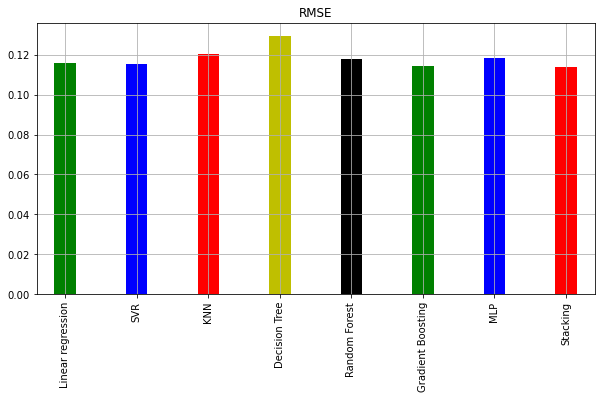

In [77]:
plt.figure(figsize=(10,5))
main_data3["rmse"]=main_data3["rmse"].astype(float)
main_data3["rmse"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("RMSE")

Text(0.5, 1.0, 'MAE')

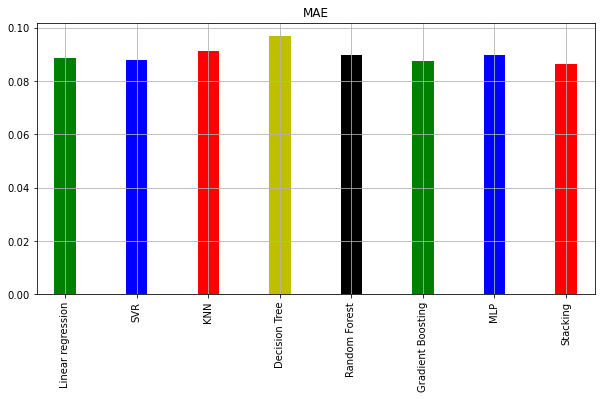

In [78]:
plt.figure(figsize=(10,5))
main_data3["mae"]=main_data3["mae"].astype(float)
main_data3["mae"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("MAE")

###SVR Tuning

In [79]:


par = {'kernel':['linear','poly','rbf','sigmoid'], 'gamma':['scale', 'auto'], 'C':[0.1,0.5,1,10],'epsilon':[0,0.01,0.1,0.5,1,2,4] }

grid_search_SVR= GridSearchCV(svr, param_grid=par, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_SVR.fit(X_train, y_train)
print(grid_search_SVR.best_estimator_)
print(grid_search_SVR.best_score_)
print(grid_search_SVR.best_params_)

SVR(C=0.1, kernel='poly')
-0.013573715499719885
{'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###KNN Tuning

In [80]:

KNeighborsRegressor(n_neighbors=5,)
par = {'n_neighbors':range(1,10),'weights':['uniform', 'distance'],'metric' : ['minkowski','euclidean','manhattan'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

grid_search_KNN = GridSearchCV(KNN, param_grid=par, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_KNN.fit(X_train, y_train)
print(grid_search_KNN.best_estimator_)
print(grid_search_KNN.best_params_)
print(grid_search_KNN.best_score_)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=9)
{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
-0.014319771245387854


###Decision Tree Tuning

In [81]:

DecisionTreeRegressor()
par = {'max_depth':[1,5,9,None], 'min_samples_split':[2,5,10,7,20],"splitter":["best","random"],'criterion':['mse','mae'],
            
           "min_samples_leaf":[1,2,3,4,5,6],
           "max_features":['auto', 'sqrt', 'log2',None],
          
           }

grid_search_DT = GridSearchCV(DT, param_grid=par, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_DT.fit(X_train, y_train)
print(grid_search_DT.best_estimator_)
print(grid_search_DT.best_score_)
print(grid_search_DT.best_params_)

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=5,
                      splitter='random')
-0.013568140456262659
{'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


###Random Forest Tuning

In [82]:


par = {'criterion':['squared_error', 'absolute_error', 'poisson'],'max_depth':[10,20,40,None], 'n_estimators':[50,100,200],
       "min_samples_leaf":[1,2,4],"max_features":['auto', 'sqrt', 'log2']}

grid_search_RF = GridSearchCV(RF, param_grid=par, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_RF.fit(X_train, y_train)
grid_search_RF.best_estimator_
print(grid_search_RF.best_score_)
print(grid_search_RF.best_params_)

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


-0.013341824599110017
{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


###Gradient Boosting Tuning


In [83]:
parameters = {
    'max_depth':[1,2,3],
    'n_estimators': [500,1000,1500],
    'learning_rate': [0.02, 0.05, 0.1]
}

grid_search_XGB = GridSearchCV(
    estimator=XGB,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search_XGB.fit(X_train,y_train)
print(grid_search_XGB.best_estimator_)
print(grid_search_XGB.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.02, max_depth=2, n_estimators=500)
{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 500}


###MLP Tuning

In [84]:
RandomizedSearchCV
par_MLP= {'neurons1':range(1,30,5),'neurons2':range(1,30,5),'neurons3':range(1,30,5),'neurons4':range(1,30,5),
       'act1':['relu','tanh'], 'act2':['relu','tanh'],'act3':['relu','tanh'], 'act4':['relu','tanh'],
       'loss':['mae','rmse'] ,
       'batch_size':[10,20,40,60,80,100],
       'optimizer':[Adam(lr=0.001),Adam(lr=0.01),Adam(lr=0.1),Adam(lr=0.2),Adam(lr=0.3),
                    SGD(0.001),SGD(0.01),SGD(0.1),SGD(0.2),SGD(0.3),
                    RMSprop(0.001),RMSprop(0.01),RMSprop(0.1),RMSprop(0.2),RMSprop(0.3)],
          'epochs':[10,50,100,200],
          'kernel_regularizer':['l1','l2']}

random_search_MLP = RandomizedSearchCV(MLP,param_distributions=par_MLP, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search_MLP.fit(X_train, y_train)
print(random_search_MLP.best_estimator_)
print(random_search_MLP.best_score_)
print(random_search_MLP.best_params_)

C:\Users\mehrn\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mehrn\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model

Epoch 1/50
60/60 [==============================] - 1s 4ms/step - loss: 0.2979 - val_loss: 0.1349
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.1202
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1174 - val_loss: 0.1169
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.1165
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1170 - val_loss: 0.1166
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1169 - val_loss: 0.1170
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1168 - val_loss: 0.1172
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1168 - val_loss: 0.1162
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1169 - val_loss: 0.1161
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1170 - val_loss: 0.1181
Epoch 11/50
60/60 [

###Tuned modela

In [85]:
network = Sequential()
network.add(Dense(128, input_dim=X_train.shape[1], activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(128, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(256, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))
network.add(Dense(256, activation='relu',kernel_regularizer='l2'))
network.add(Dropout(0.2))

network.add(Dense(1, activation='linear'))


network.compile(loss='mse', optimizer=Adam(lr=0.001))

history = network.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
38/38 [==============================] - 1s 7ms/step - loss: 4.0367 - val_loss: 2.3189
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 1.4681 - val_loss: 0.8004
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5012 - val_loss: 0.2715
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1737 - val_loss: 0.0982
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0673 - val_loss: 0.0422
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.0238
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0174
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0151
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0144
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0146
Epoch 11/

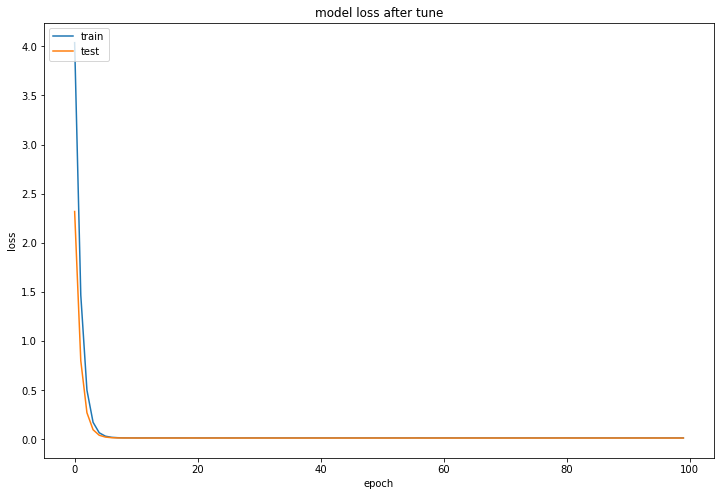

In [86]:
  plt.figure(figsize=(12,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss after tune')
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [87]:
svr=grid_search_SVR.best_estimator_
DT=grid_search_DT.best_estimator_
LR=LinearRegression()
KNN=grid_search_KNN.best_estimator_
XGB=grid_search_XGB.best_estimator_
RF=grid_search_RF.best_estimator_
# mlp=grid_search_MLP.best_estimator_
mlp=MLP

In [88]:
# define the base models
level0 = list()

level0.append(('LR', LR))
level0.append(('SVR', svr))
level0.append(('DT', DT))
level0.append(('KNN', KNN))
level0.append(('XGB', XGB))
level0.append(('RF', RF))
level0.append(('MLP', mlp))
# define meta learner model
level1 = LR
# define the stacking ensemble
model_stack = StackingRegressor(estimators=level0, final_estimator=level1)

In [89]:
rmse_LR , mae_LR,r2score_LR=trainandevaluate(LR)
rmse_KNN, mae_KNN,r2score_KNN=trainandevaluate(KNN)
rmse_svr, mae_svr,r2score_svr=trainandevaluate(svr)
rmse_DT, mae_DT,r2score_DT=trainandevaluate(DT)
rmse_RF, mae_RF,r2score_RF=trainandevaluate(RF)
rmse_XGB, mae_XGB,r2score_XGB=trainandevaluate(XGB)
rmse_mlp, mae_mlp,r2score_mlp=trainandevaluate(MLP)
rmse_stack, mae_stack,r2score_stack=trainandevaluate(model_stack)

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
<ipython-input-74-134ea8fde1de>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train , y_train)
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 1.2171 - val_loss: 0.0865
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0158
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.0142
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0141
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 11/

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 1.1745 - val_loss: 0.0856
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0154
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0140
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0140
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0140
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0147
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 11/

C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\mehrn\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 1.1972 - val_loss: 0.0865
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.0156
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0141
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0142
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 11/

In [90]:
dic4={"rmse_b":[("{:.4f}".format(rmse_LR_b)),("{:.4f}".format(rmse_svr_b)),("{:.4f}".format(rmse_KNN_b)),
             ("{:.4f}".format(rmse_DT_b)),("{:.4f}".format(rmse_RF_b)),("{:.4f}".format(rmse_XGB_b)),("{:.4f}".format(rmse_mlp_b)),("{:.4f}".format(rmse_stack_b))],
      "mae_b":[("{:.4f}".format(mae_LR_b)),("{:.4f}".format(mae_svr_b)),("{:.4f}".format(mae_KNN_b)),
             ("{:.4f}".format(mae_DT_b)),("{:.4f}".format(mae_RF_b)),("{:.4f}".format(mae_XGB_b)),("{:.4f}".format(mae_mlp_b)),("{:.4f}".format(mae_stack_b))],
      # "r2_score_b":[("{:.4f}".format(r2score_LR_b)),("{:.4f}".format(r2score_svr_b)),("{:.4f}".format(r2score_KNN_b)),
      #        ("{:.4f}".format(r2score_DT_b)),("{:.4f}".format(r2score_FR_b)),("{:.4f}".format(r2score_XGB_b)),("{:.4f}".format(r2score_mlp_b)),
      #        ("{:.4f}".format(r2score_stack_b))],
    

    "rmse":[("{:.4f}".format(rmse_LR)),("{:.4f}".format(rmse_svr)),("{:.4f}".format(rmse_KNN)),
             ("{:.4f}".format(rmse_DT)),("{:.4f}".format(rmse_RF)),("{:.4f}".format(rmse_XGB)),("{:.4f}".format(rmse_mlp)),("{:.4f}".format(rmse_stack))],
      "mae":[("{:.4f}".format(mae_LR)),("{:.4f}".format(mae_svr)),("{:.4f}".format(mae_KNN)),
             ("{:.4f}".format(mae_DT)),("{:.4f}".format(mae_RF)),("{:.4f}".format(mae_XGB)),("{:.4f}".format(mae_mlp)),("{:.4f}".format(mae_stack))]}
      # "r2_score":[("{:.4f}".format(r2score_LR)),("{:.4f}".format(r2score_svr)),("{:.4f}".format(r2score_KNN)),
      #        ("{:.4f}".format(r2score_DT)),("{:.4f}".format(r2score_FR)),("{:.4f}".format(r2score_XGB)),("{:.4f}".format(r2score_mlp)),
      #        ("{:.4f}".format(r2score_stack))]}
main_data3=pd.DataFrame.from_dict( dic4 , orient='index')
main_data3.columns=['Linear regression','SVR','KNN','Decision Tree','Random Forest','Gradient Boosting','MLP','Stacking']
main_data3 = main_data3
main_data3

,Linear regression,SVR,KNN,Decision Tree,Random Forest,Gradient Boosting,MLP,Stacking
rmse_b,0.1160,0.1151,0.1203,0.1295,0.1177,0.1143,0.1181,0.1138
mae_b,0.0887,0.0881,0.0912,0.0971,0.0897,0.0877,0.0897,0.0864
rmse,0.1160,0.1153,0.1156,0.1141,0.1130,0.1135,0.1181,0.1139
mae,0.0887,0.0880,0.0887,0.0883,0.0865,0.0871,0.0908,0.0872


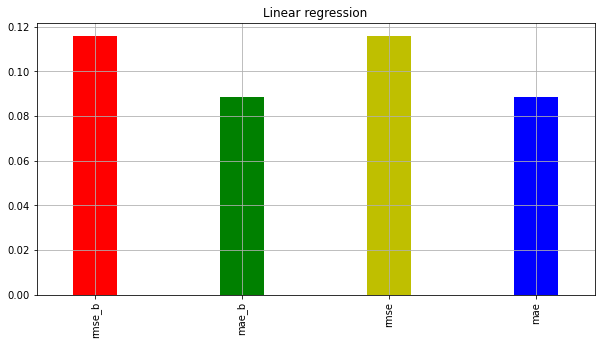

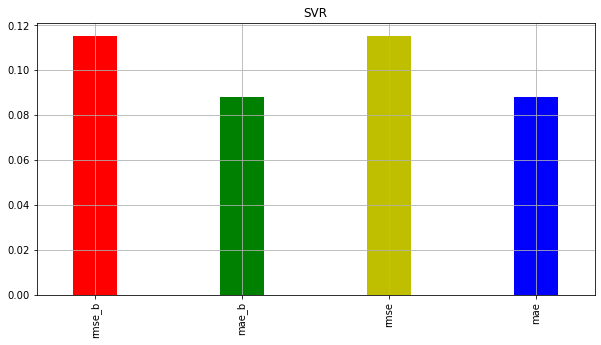

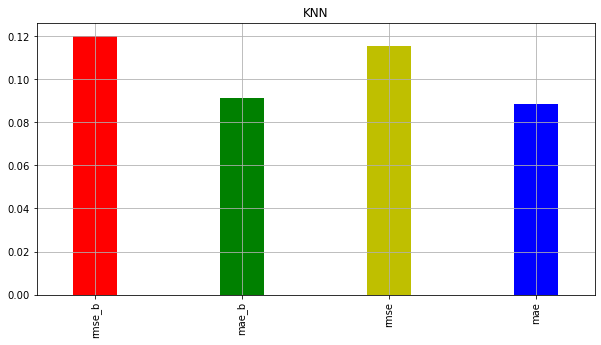

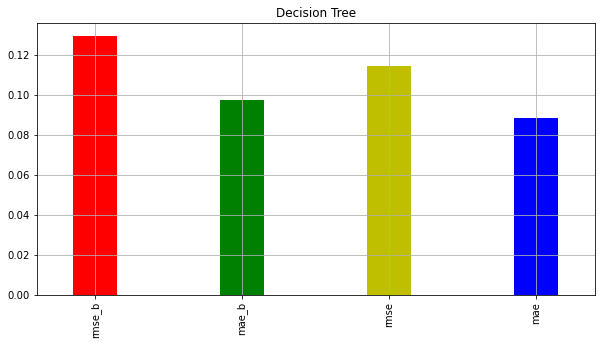

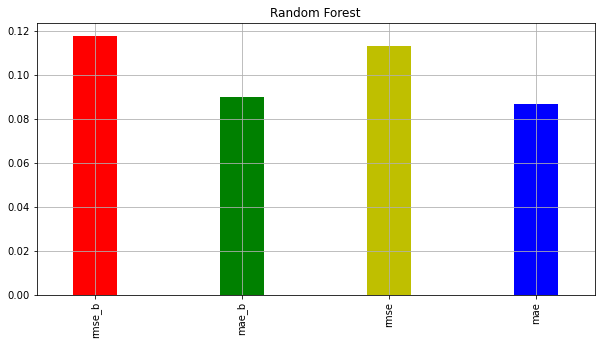

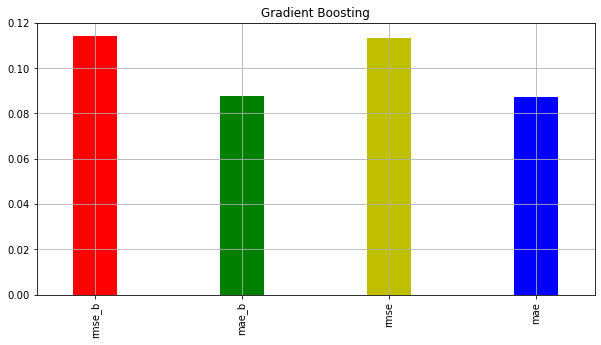

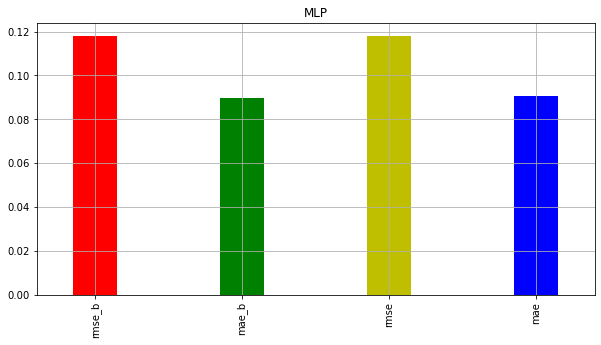

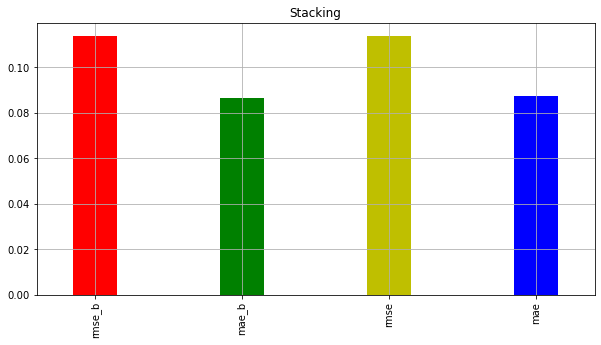

In [91]:
for i in main_data3.columns:
  plt.figure(figsize=(10,5))
  main_data3[i]=main_data3[i].astype(float)
  main_data3[i].plot(kind="bar", grid=True , color=tuple(["r", "g","y","b","k"]) , width=0.3)
  plt.title(i)